In [ ]:
# https://towardsdatascience.com/using-word2vec-to-analyze-news-headlines-and-predict-article-success-cdeda5f14751

In [22]:
import gzip
import json
import pandas as pd

import spacy


In [23]:
from pyspark.sql import SparkSession

from pyspark import SparkFiles

spark = SparkSession.builder.appName('nlp_spark').getOrCreate()

a

df.show(n=3)


+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+----------------------+--------------------+--------------------+
|         annotations|       document_html|      document_title|     document_tokens|        document_url|          example_id|long_answer_candidates|       question_text|     question_tokens|
+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+----------------------+--------------------+--------------------+
|[{440992336315739...|<!DOCTYPE html>
<...|United States twe...|[{98, false, 92, ...|https://en.wikipe...|-1343909637711382355|  [{53308, 151, 507...|who appeared in t...|[who, appeared, i...|
|[{135645265735369...|<!DOCTYPE html>
<...|All-India Muslim ...|[{95, false, 92, ...|https://en.wikipe...| 3478816195086130677|  [{64459, 256, 585...|who presided over...|[who, presided, o...|
|[{306580618498655...|<!DOCTYPE htm

In [24]:
df.printSchema()

root
 |-- annotations: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- annotation_id: decimal(20,0) (nullable = true)
 |    |    |-- long_answer: struct (nullable = true)
 |    |    |    |-- candidate_index: long (nullable = true)
 |    |    |    |-- end_byte: long (nullable = true)
 |    |    |    |-- end_token: long (nullable = true)
 |    |    |    |-- start_byte: long (nullable = true)
 |    |    |    |-- start_token: long (nullable = true)
 |    |    |-- short_answers: array (nullable = true)
 |    |    |    |-- element: struct (containsNull = true)
 |    |    |    |    |-- end_byte: long (nullable = true)
 |    |    |    |    |-- end_token: long (nullable = true)
 |    |    |    |    |-- start_byte: long (nullable = true)
 |    |    |    |    |-- start_token: long (nullable = true)
 |    |    |-- yes_no_answer: string (nullable = true)
 |-- document_html: string (nullable = true)
 |-- document_title: string (nullable = true)
 |-- document_to

In [1]:
import pandas as pd
data = pd.read_csv('EtownData.csv',header=None)

In [2]:
data.head(1)

,0,1,2
0,When was Elizabethtown College first opened?,1899,1


In [3]:
def getResults(questions, fn):
    def getResult(q):
        answer, score, prediction = fn(q)
        return [q, prediction, answer, score]
    return pd.DataFrame(list(map(getResult, questions)), columns=["0", "Prediction", "1", "Score"])


In [4]:

test_data = [
    "When was Elizabethtown College first opened?",
    "How many undergraduate students go to Etown?",
    "How much does Etown cost per semester?",
    "Are your professors good teachers?",
    "Are there sports at Etown?",
    "Are there TA's at Etown?",
    "How are the dorms?"
]
data

,0,1,2
0,When was Elizabethtown College first opened?,1899,1
1,When was Etown opened?,1899,1
2,Who originally founded Elizabethtown College?,Reverend Jacob G. Francis in 1899,1
3,Who founded Etown?,Reverend Jacob G. Francis in 1899,1
4,When was Elizabethtown College originally foun...,1899,1
...,...,...,...
350,Is Elizabethtown College a college or a univer...,Elizabethtown College is a college,1
351,What year was Elizabethtown College opened?,1899,1
352,When was Elizabethtown College officially opened?,1899,1
353,What is the best thing Elizabethtown College h...,The academics at Elizabethtown College are exc...,12


In [1]:
import numpy as np

In [2]:
#from pyspark import SparkContext
#sc =SparkContext()

In [3]:
from pyspark.sql import SparkSession

from pyspark import SparkFiles

spark = SparkSession.builder.appName('nlp_spark').getOrCreate()


In [ ]:
#from pyspark.mllib.feature import HashingTF, IDF

# Load documents (one per line).
#documents = sc.textFile("EtownData.csv").map(lambda line: line.split(","))


In [4]:

data = spark.read.csv("EtownData.csv", inferSchema=True, header=True)


In [5]:

documents = spark.createDataFrame([(data,), (data,)], ["sentence"])
word2Vec = Word2Vec(vectorSize=5, seed=42, inputCol="sentence", outputCol="model")
word2Vec.setMaxIter(10)

TypeError: Unable to infer the type of the field sentence.

In [ ]:

word2Vec.getMaxIter()

word2Vec.clear(word2Vec.maaaxIter)
model = word2Vec.fit(doc)
model.getMinCount()
5
model.setInputCol("sentence")
Word2VecModel...
model.getVectors().show()

In [26]:
hashingTF = HashingTF()
tf = hashingTF.transform(documents)


In [27]:
from pyspark.mllib.feature import Word2Vec

In [28]:

inp = sc.textFile("EtownData.csv").map(lambda row: row.split(","))

word2vec = Word2Vec()
model = word2vec.fit(inp)


In [29]:


model.getVectors().show()

Py4JError: An error occurred while calling o138.show. Trace:
py4j.Py4JException: Method show([]) does not exist
	at py4j.reflection.ReflectionEngine.getMethod(ReflectionEngine.java:318)
	at py4j.reflection.ReflectionEngine.getMethod(ReflectionEngine.java:326)
	at py4j.Gateway.invoke(Gateway.java:274)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:238)
	at java.base/java.lang.Thread.run(Thread.java:829)



In [1]:
from pyspark import SparkContext
from pyspark.mllib.feature import Word2Vec

sc = SparkContext()
inp = sc.textFile("EtownData.csv").map(lambda row: row.split(","))

k = 220         # vector dimensionality
word2vec = Word2Vec().setVectorSize(k)
model = word2vec.fit(inp)

In [2]:
model.getVectors()

{'8': [-0.0005207785, 0.0018642269, -0.0020159786, 0.0012562645, -0.00074425555, -0.001215369, 0.00090220524, 0.00087702763, 0.0011662169, 0.0016499638, -0.001106337, 0.0013904213, 0.001999621, -0.002017543, -0.0009006107, -0.00063692656, -8.840215e-05, -0.00042869823, 0.00040007223, 0.0003621436, 0.0020767762, 0.0012633728, 0.0006133259, 0.0018625138, 0.00037779537, 0.0022293536, -0.0011901249, 0.0022658445, 0.0018269783, 0.0010269567, -0.0014605577, 0.0010853522, 0.00079436327, 0.0020338183, -0.0001595937, -0.0014653606, 0.00043676316, -0.00022237826, -0.0010647047, -0.0021005226, 0.00054088834, 0.00023933296, 0.002238739, 0.0013774403, -0.0017041247, -0.00026021802, 0.0018173252, 0.0012452161, 0.002074269, 0.0009132609, -0.0012364592, 0.0014753913, -0.00056348776, -0.0015934733, -0.0017699178, 0.0010695513, 0.0016798902, -0.00109694, 0.0007959052, -4.5789886e-05, -0.0021281329, -0.0017649332, -0.0013330065, -0.0021176043, 0.0012279729, -0.00023660788, -0.0021466427, 0.0013694364, -0

In [59]:
#https://towardsdatascience.com/using-word2vec-to-analyze-news-headlines-and-predict-article-success-cdeda5f14751

In [1]:
import pandas as pd
import gensim
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import xgboost as xgb

In [2]:
main_data = pd.read_csv('EtownData.csv')
main_data.head()

,Questions,Answers,Category
0,When was Elizabethtown College first opened?,1899,1
1,When was Etown opened?,1899,1
2,Who originally founded Elizabethtown College?,Reverend Jacob G. Francis in 1899,1
3,Who founded Etown?,Reverend Jacob G. Francis in 1899,1
4,When was Elizabethtown College originally foun...,1899,1


In [3]:
from wordcloud import WordCloud 


In [6]:
main_data.shape[0] 

355

In [4]:
words = []

for i in range(main_data.shape[0] - 1):
    row = main_data.iloc[i + 1]
    words.append(row['Questions'])
    words.append(row['Answers'])

(-0.5, 1599.5, 799.5, -0.5)

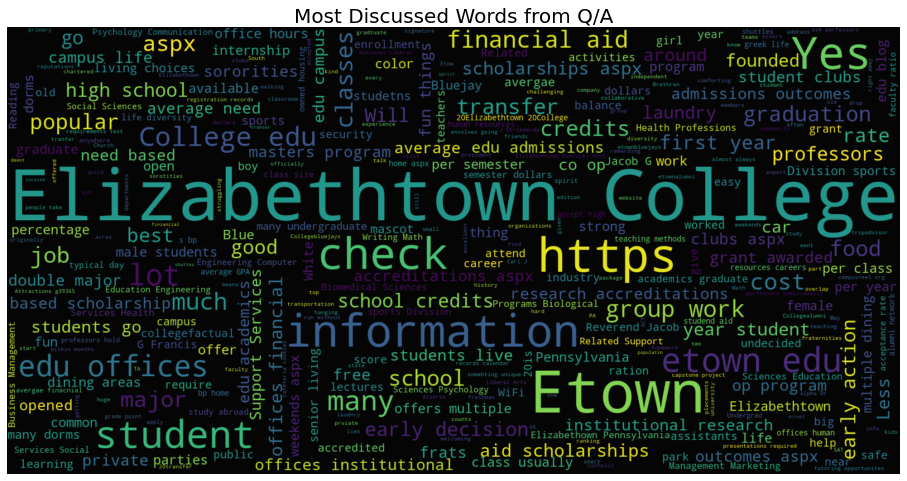

In [10]:
plt.figure(figsize=(16,13))
wc = WordCloud(background_color="black", max_words=1000, max_font_size= 200,  width=1600, height=800)
wc.generate(" ".join(words))
plt.title("Most Discussed Words from Q/A", fontsize=20)
plt.imshow(wc.recolor( colormap= 'viridis' , random_state=17), alpha=0.98, interpolation="bilinear", )
plt.axis('off')

In [3]:
# Grab all the titles 
article_titles = main_data['Questions']
# Create a list of strings, one for each title
titles_list = [title for title in article_titles]

# Collapse the list of strings into a single long string for processing
big_title_string = ','.join(titles_list)


In [4]:

from nltk.tokenize import word_tokenize

# Tokenize the string into words
tokens = word_tokenize(big_title_string)

# Remove non-alphabetic tokens, such as punctuation
words = [word.lower() for word in tokens if word.isalpha()]


In [5]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [6]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words("english")
#eliminate words that are so commonly used that they carry very little useful information.

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/moynihanl/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:

words = [word for word in words if not word in stop_words]

# Print first 10 words
words[:10]

['elizabethtown',
 'college',
 'first',
 'opened',
 'etown',
 'opened',
 'originally',
 'founded',
 'elizabethtown',
 'college']

In [8]:
# Load word2vec model (trained on an enormous Google corpus)
model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary = True) 

#learn word associations from a large corpus of text

# Check dimension of word vectors
model.vector_size

300

In [9]:
economy_vec = model['economy']
economy_vec[:20] # First 20 components

array([ 0.18847656, -0.0703125 , -0.16113281,  0.03857422, -0.04956055,
       -0.23046875, -0.15722656, -0.16992188,  0.17089844, -0.01208496,
       -0.16015625, -0.02770996,  0.05932617,  0.00491333, -0.13769531,
        0.39257812,  0.06201172,  0.30859375,  0.12890625, -0.07373047],
      dtype=float32)

In [33]:
# Filter the list of vectors to include only those that Word2Vec has a vector for
vector_list = [model[word] for word in words if word in model.vocab]

# Create a list of the words corresponding to these vectors
words_filtered = [word for word in words if word in model.vocab]

# Zip the words together with their vector representations
word_vec_zip = zip(words_filtered, vector_list)

# Cast to a dict so we can turn it into a DataFrame
word_vec_dict = dict(word_vec_zip)
df = pd.DataFrame.from_dict(word_vec_dict, orient='index')
df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
college,0.035889,0.059082,0.024414,0.347656,0.144531,-0.069336,0.186523,-0.070312,-0.039062,-0.149414,...,-0.171875,-0.036377,-0.349609,-0.209961,0.054688,-0.066895,-0.062500,0.090332,-0.018555,0.240234
first,0.122559,-0.089355,0.026978,0.073730,0.063965,-0.171875,-0.174805,-0.099121,0.224609,0.119141,...,-0.091797,-0.035400,-0.074219,0.059326,0.044678,-0.041992,-0.146484,-0.063965,-0.071777,-0.138672
opened,-0.015564,0.267578,0.157227,0.053711,0.040771,-0.339844,-0.292969,-0.028198,0.137695,0.027710,...,-0.125977,0.062012,-0.220703,0.093750,-0.001770,-0.061035,0.308594,-0.132812,-0.243164,-0.079590


In [34]:
from sklearn.manifold import TSNE

# Initialize t-SNE
tsne = TSNE(n_components = 2, init = 'random', random_state = 10, perplexity = 100)

# Use only 300 rows to shorten processing time
tsne_df = tsne.fit_transform(df[:300])

In [38]:
from adjustText import adjust_text


/home/lip/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


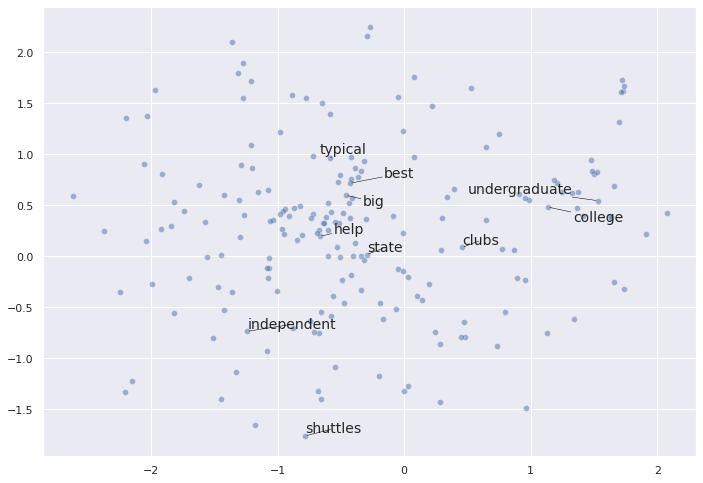

In [40]:
sns.set()
# Initialize figure
fig, ax = plt.subplots(figsize = (11.7, 8.27))
sns.scatterplot(tsne_df[:, 0], tsne_df[:, 1], alpha = 0.5)

# Import adjustText, initialize list of texts
texts = []
words_to_plot = list(np.arange(0, 100, 10))

# Append words to list
for word in words_to_plot:
    texts.append(plt.text(tsne_df[word, 0], tsne_df[word, 1], df.index[word], fontsize = 14))
    
# Plot text using adjust_text (because overlapping text is hard to read)
adjust_text(texts, force_points = 0.4, force_text = 0.4, 
            expand_points = (2,1), expand_text = (1,2),
            arrowprops = dict(arrowstyle = "-", color = 'black', lw = 0.5))

plt.show()

In [41]:
def document_vector(word2vec_model, doc):
    # remove out-of-vocabulary words
    doc = [word for word in doc if word in model.vocab]
    return np.mean(model[doc], axis=0)

# Our earlier preprocessing was done when we were dealing only with word vectors
# Here, we need each document to remain a document 
def preprocess(text):
    text = text.lower()
    doc = word_tokenize(text)
    doc = [word for word in doc if word not in stop_words]
    doc = [word for word in doc if word.isalpha()] 
    return doc

# Function that will help us drop documents that have no word vectors in word2vec
def has_vector_representation(word2vec_model, doc):
    """check if at least one word of the document is in the
    word2vec dictionary"""
    return not all(word not in word2vec_model.vocab for word in doc)

# Filter out documents
def filter_docs(corpus, texts, condition_on_doc):
    """
    Filter corpus and texts given the function condition_on_doc which takes a doc. The document doc is kept if condition_on_doc(doc) is true.
    """
    number_of_docs = len(corpus)

    if texts is not None:
        texts = [text for (text, doc) in zip(texts, corpus)
                 if condition_on_doc(doc)]

    corpus = [doc for doc in corpus if condition_on_doc(doc)]

    print("{} docs removed".format(number_of_docs - len(corpus)))

    return (corpus, texts)

In [42]:
# Preprocess the corpus
corpus = [preprocess(title) for title in titles_list]

# Remove docs that don't include any words in W2V's vocab
corpus, titles_list = filter_docs(corpus, titles_list, lambda doc: has_vector_representation(model, doc))

# Filter out any empty docs
corpus, titles_list = filter_docs(corpus, titles_list, lambda doc: (len(doc) != 0))
x = []
for doc in corpus: # append the vector for each document
    x.append(document_vector(model, doc))
    
X = np.array(x) # list to array

0 docs removed
0 docs removed


/home/lip/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


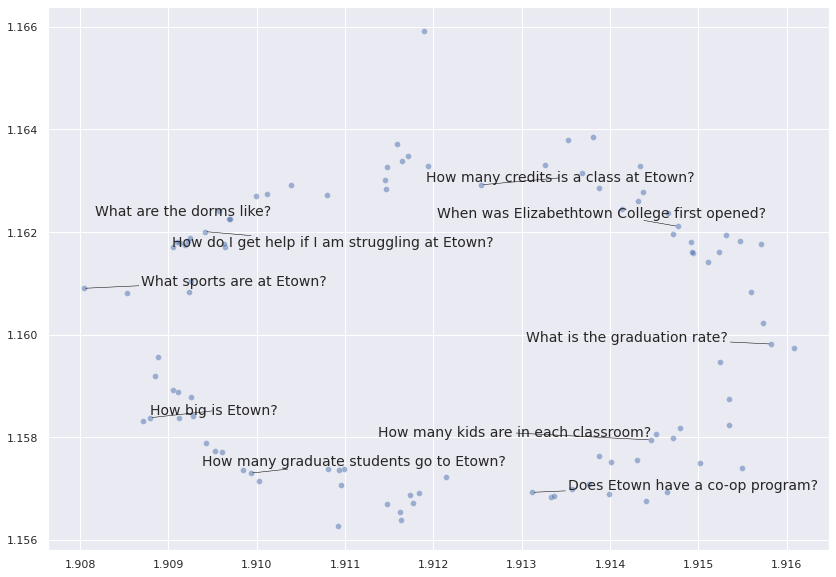

In [45]:
# Initialize t-SNE
tsne = TSNE(n_components = 2, init = 'random', random_state = 10, perplexity = 100)

# Again use only 400 rows to shorten processing time
tsne_df = tsne.fit_transform(X[:100])
fig, ax = plt.subplots(figsize = (14, 10))
sns.scatterplot(tsne_df[:, 0], tsne_df[:, 1], alpha = 0.5)

from adjustText import adjust_text
texts = []
titles_to_plot = list(np.arange(0, 100, 10)) # plots every 40th title in first 400 titles

# Append words to list
for title in titles_to_plot:
    texts.append(plt.text(tsne_df[title, 0], tsne_df[title, 1], titles_list[title], fontsize = 14))
    
# Plot text using adjust_text
adjust_text(texts, force_points = 0.4, force_text = 0.4, 
            expand_points = (2,1), expand_text = (1,2),
            arrowprops = dict(arrowstyle = "-", color = 'black', lw = 0.5))

plt.show()

# Popularity Prediction

In [46]:
from sklearn.decomposition import PCA

pca = PCA(n_components=15, random_state=10)

# as a reminder, x is the array with our 300-dimensional vectors
reduced_vecs = pca.fit_transform(x)
df_w_vectors = pd.DataFrame(reduced_vecs)

df_w_vectors['Questions'] = titles_list
# Use pd.concat to match original titles with their vectors
main_w_vectors = pd.concat((df_w_vectors, main_data), axis=1)

# Get rid of vectors that couldn't be matched with the main_df
main_w_vectors.dropna(axis=0, inplace=True)

In [51]:
fb_data_only_df = main_data.drop(columns=['Answers', 'Category'])

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
# Separate the features and the response
X = fb_data_only_df.drop('Questions', axis=1)
y = fb_data_only_df['Questions']

# 80% of data goes to training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [58]:
from sklearn.metrics import mean_squared_error

# Instantiate an XGBRegressor
xgr = xgb.XGBRegressor(random_state=2)

# Fit the classifier to the training set
xgr.fit(X_train, y_train)

y_pred = xgr.predict(X_test)

mean_squared_error(y_test, y_pred)

ValueError: could not convert string to float: 'Does Elizabethtown College have engineering?'